Generage signal data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

# sampling frequency
fs = 1000

# time vector from 0 to 10 in increments of 1/fs
t = np.arange(0, 10, 1/fs)

# damped sin function
def damped_sine(x, fn):
    return np.sin(2 * np.pi * fn * x) * np.exp(-fn * np.abs(x))

# Define pulse locations and their amplitudes
d = np.arange(1, 11, 2)
amps = 1.3 ** -d
dd = np.column_stack((d, amps))

SNR = 2

# Define a function like MATLAB's pulstran
def pulstran(t, dd, fnx, fn):
    y = np.zeros_like(t)
    for ti, ai in dd:
        y += ai * fnx(t - ti, fn)
    return y

def db2mag(db):
    return 10 ** (db / 20)

y = pulstran(t, dd, damped_sine, 10)

# Add white Gaussian noise
noise = np.random.randn(*y.shape) * np.std(y) / db2mag(SNR)
y_noisy = y + noise



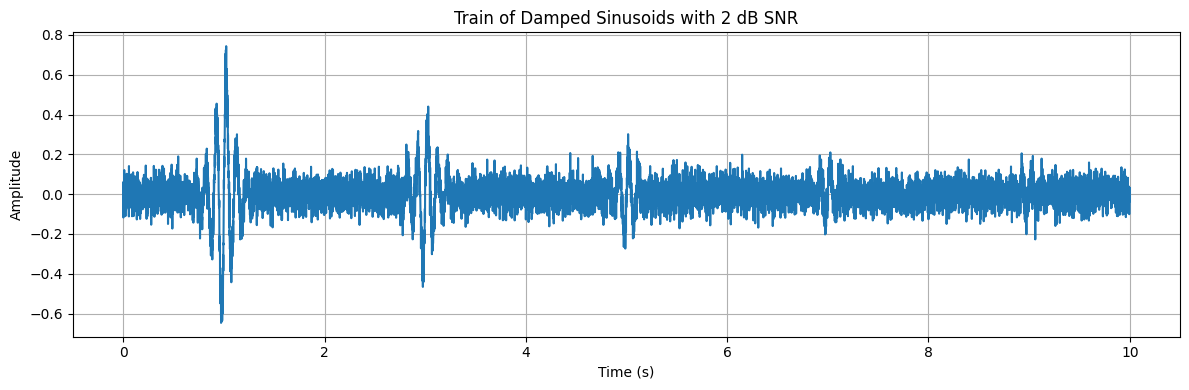

In [2]:
plt.figure(figsize=(12, 4))
plt.plot(t, y_noisy)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Train of Damped Sinusoids with 2 dB SNR")
plt.grid(True)
plt.tight_layout()
plt.show()

Spectral Kurtosis

In [ ]:
from scipy.signal import stft
from scipy.stats import kurtosis

# Compute spectral kurtosis
def spectral_kurtosis(y, fs, nperseg=256, noverlap=128):
    f, t_stft, Zxx = stft(y, fs=fs, nperseg=nperseg, noverlap=noverlap, window='hann')
    power = np.abs(Zxx)**2 # Power spectrogram

    # Kurtosis across frequency axis for each time frame
    krt = kurtosis(power, axis=0, fisher=True, bias=False)
    return krt, t_stft

# Apply spectral kurtosis function
krt, t_krt = spectral_kurtosis(y_noisy, fs)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(t_krt, krt)
plt.xlabel("Time (s)")
plt.ylabel("Spectral Kurtosis")
plt.title("Spectral Kurtosis Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: operands could not be broadcast together with shapes (129,80) (129,) 